## Simple CNN Malaria 
with 3000 pictures of each class (uninfected/infected)

In [1]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(0)

2021-12-01 00:03:38.537797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 00:03:38.537859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Training

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_train = image_dataset_from_directory('../raw_data/malaria/SimpleModel/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=32,
                                        image_size=(128,128),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.2,
                                        subset='training',
                                        crop_to_aspect_ratio=False)
data_train

Found 6000 files belonging to 2 classes.
Using 4800 files for training.


2021-12-01 00:03:41.778678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-01 00:03:41.778736: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-01 00:03:41.778791: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-RMG61NL5): /proc/driver/nvidia/version does not exist
2021-12-01 00:03:41.779127: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<BatchDataset shapes: ((None, 128, 128, 3), (None, 1)), types: (tf.float32, tf.float32)>

#### Validation 

In [3]:
data_val = image_dataset_from_directory('../raw_data/malaria/SimpleModel/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=32,
                                        image_size=(128,128),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.2,
                                        subset='validation',
                                        crop_to_aspect_ratio=False)
data_val

Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


<BatchDataset shapes: ((None, 128, 128, 3), (None, 1)), types: (tf.float32, tf.float32)>

#### Model 

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(128,128,3)))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

In [6]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()

model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy','Recall'])

In [7]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(data_train,
                    epochs=15,
                    callbacks=es,
                    validation_data=data_val)

Epoch 1/15
150/150 [==============================] - 25s 163ms/step - loss: 0.6882 - accuracy: 0.5429 - recall: 0.5021 - val_loss: 0.6469 - val_accuracy: 0.6533 - val_recall: 0.6849
Epoch 2/15
150/150 [==============================] - 29s 193ms/step - loss: 0.6259 - accuracy: 0.6692 - recall: 0.6749 - val_loss: 0.4915 - val_accuracy: 0.8067 - val_recall: 0.7412
Epoch 3/15
150/150 [==============================] - 35s 236ms/step - loss: 0.4113 - accuracy: 0.8402 - recall: 0.9138 - val_loss: 0.3214 - val_accuracy: 0.8842 - val_recall: 0.9807
Epoch 4/15
150/150 [==============================] - 35s 230ms/step - loss: 0.4272 - accuracy: 0.8494 - recall: 0.9613 - val_loss: 0.6107 - val_accuracy: 0.6717 - val_recall: 0.9904
Epoch 5/15
150/150 [==============================] - 34s 223ms/step - loss: 0.4036 - accuracy: 0.8269 - recall: 0.8974 - val_loss: 0.3065 - val_accuracy: 0.9158 - val_recall: 0.9823
Epoch 6/15
150/150 [==============================] - 32s 213ms/step - loss: 0.3196 -

#### Plots

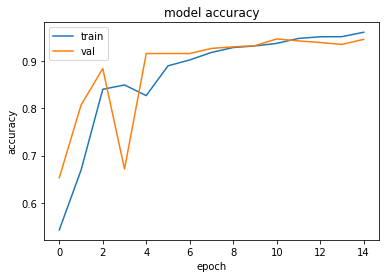

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

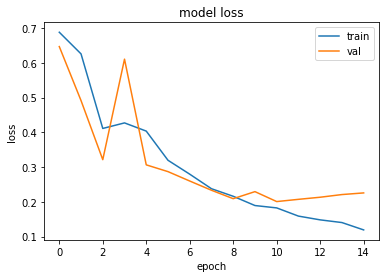

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
#model.evaluate(data_val)